In [1]:
from my_weapon import *

In [8]:
data = pd.read_csv("web/data/undecided_users-14days-0720-0806.csv").set_index("dt")

In [9]:
data = data.round(3)

In [12]:
data.index = pd.to_datetime(data.index)

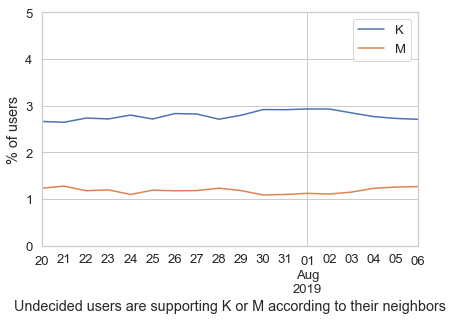

In [31]:
sns.set(style="whitegrid", font_scale=1.2)

data["K"].plot()
data["M"].plot()
plt.legend()
plt.ylabel("% of users")
plt.ylim(0, 5)
plt.xlabel("Undecided users are supporting K or M according to their neighbors")
plt.savefig("fig/undecided.png", bbox_inches = 'tight')

In [61]:
data = pd.read_csv("web/data/undecided_users-7days-0720-0808.csv").set_index("dt")

In [62]:
data

,K,M,U,per
dt,,,,
2019-07-31,2.342764,1.150184,3.507052,0.057016
2019-08-01,2.086099,1.574346,3.339555,0.056522
2019-08-02,2.001008,1.692432,3.306560,0.057280
2019-08-03,1.952405,1.571188,3.476407,0.059304
2019-08-04,1.873212,1.640952,3.485836,0.063867
2019-08-05,1.937850,1.645556,3.416594,0.067354
2019-08-06,2.162689,1.317957,3.519354,0.068401
2019-08-07,2.111370,1.193168,3.695462,0.068837
2019-08-08,2.069382,1.189092,3.741526,0.069135


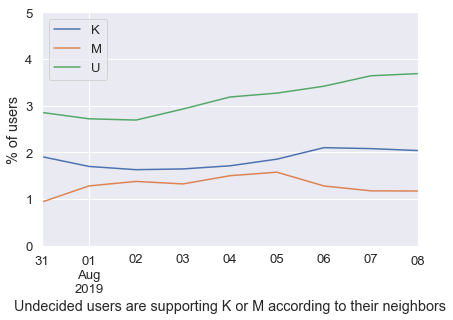

In [63]:
sns.set(style="darkgrid", font_scale=1.2)
data = data.round(3)
data.index = pd.to_datetime(data.index)
data["K"] = data["K"] / 0.07 * data["per"]
data["M"] = data["M"] / 0.07 * data["per"]
data["U"] = data["U"] / 0.07 * data["per"]
data["K"].plot()
data["M"].plot()
data["U"].plot()
plt.legend()
plt.ylabel("% of users")
plt.ylim(0, 5)
plt.xlabel("Undecided users are supporting K or M according to their neighbors")
plt.savefig("fig/undecided.png", bbox_inches = 'tight')

In [64]:
data

,K,M,U,per
dt,,,,
2019-07-31,1.907871,0.936429,2.855700,0.057
2019-08-01,1.698600,1.281686,2.719714,0.057
2019-08-02,1.629386,1.377771,2.692843,0.057
2019-08-03,1.645257,1.324129,2.929771,0.059
2019-08-04,1.712457,1.500343,3.187200,0.064
2019-08-05,1.854943,1.575457,3.270557,0.067
2019-08-06,2.101200,1.280343,3.418457,0.068
2019-08-07,2.080843,1.175957,3.642214,0.069
2019-08-08,2.039443,1.172014,3.688543,0.069


In [ ]:
import networkx as nx 

In [ ]:
import pendulum

def get_undecided_users(_users):
    _undecided_users = []
    _K_users = set()
    _M_users = set()
    for u, v in _users.items():
        u = int(u)
        if v["I"] > 0:
            continue
        if v["K"] == v["M"] and v["K"] > 0:
            _undecided_users.append(u)
        elif v["K"] > v["M"]:
            _K_users.add(u)
        elif v["M"] > v["K"]:
            _M_users.add(u)
            
    return _undecided_users, _K_users, _M_users

start = pendulum.date(2019, 3, 2)
end   = pendulum.date(2019, 10, 11)

for dt in pendulum.Period(start, end):
    print(dt)
    FF = 0
    MP = 0
    UN = 0
    users = json.load(open(f"disk/cul_from_March_1_v2/{dt.to_date_string()}-0.6.txt"))
    undecided_users, K_users, M_users = get_undecided_users(users)
    
    graph = nx.read_gpickle(f"disk/network/{dt.to_date_string()}.gp")
    graph = graph.to_undirected()
    
    for u in tqdm(undecided_users):
        _k = 0
        _m = 0
        if u in graph:
            for neigh in graph.neighbors(u):
                if neigh in K_users:
                    _k += 1
                elif neigh in M_users:
                    _m += 1
                    
        if _k > _m:
            FF += 1
        elif _k < _m:
            MP += 1
        else:
            UN += 1
            
    rst = {"dt": dt.to_date_string(), "FF": FF, "MP": MP, "UN": UN}
    print(rst)